<a href="https://www.kaggle.com/code/faressayah/how-to-analyse-large-datasets-dask-tutorial?scriptVersionId=119299089" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Dask Delayed

These functions do simple operations like add two numbers together, but they sleep for a random amount of time to simulate real work.

In [1]:
from dask.distributed import Client, progress

c = Client()
c

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 31.36 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46125,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 31.36 GiB
Comm: tcp://127.0.0.1:35531,Total threads: 1
Dashboard: http://127.0.0.1:35017/status,Memory: 7.84 GiB
Nanny: tcp://127.0.0.1:44481,


In [2]:
import time
import random
import dask


@dask.delayed
def inc(x):
    time.sleep(random.random())
    return x + 1

@dask.delayed
def dec(x):
    time.sleep(random.random())
    return x - 1

def add(x, y):
    time.sleep(random.random())
    return x + y

In [3]:
%%time
x = inc(1)
y = dec(2)
z = add(x, y)
z

CPU times: user 32.5 ms, sys: 2.18 ms, total: 34.7 ms
Wall time: 422 ms


Delayed('add-12cdf2b0df197ef99b29a77a71d2b459')

In [4]:
%%time
z.compute()

CPU times: user 161 ms, sys: 54.2 ms, total: 215 ms
Wall time: 943 ms


3

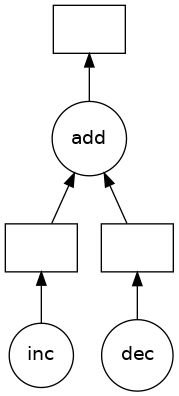

In [5]:
z.visualize()

In [6]:
def inc(x):
    time.sleep(1)
    return x + 1

def dec(x):
    time.sleep(1)
    return x - 1

def add(x, y):
    time.sleep(1)
    return x + y

data = [1, 2, 3, 4, 5, 6, 7, 8]

In [7]:
%%time

results = []

for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)

CPU times: user 633 ms, sys: 103 ms, total: 736 ms
Wall time: 8.01 s


In [8]:
total

44

# Dask natively scales Python

Dask provides advanced parallelism for analytics, enabling performance at scale for the tools you love

In [9]:
import os
import time


import dask
import dask.array as da
import dask.dataframe as dd
import numpy as np

In [10]:
print(dask.__version__)
print(np.__version__)

2022.02.0
1.21.6


In [11]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/stanford-open-policing-project-texas/TX_2010_onwards.csv
/kaggle/input/stanford-open-policing-project-texas/DATA-README.md


# Reading Dask DataFrame

Read CSV files into a Dask.DataFrame: This parallelizes the `pandas.read_csv()`:
- `blocksize=25e7`: 250MB chunks
- `dtype`: Dask don't explore all the data, sometime it mismatch the dtypes

In [12]:
dtype = {
    'fine_grained_location': 'float64', 
    'officer_id':'object', 
    'county_fips': 'float64',
    'search_type': 'object',
    'search_type_raw': 'object'
}

ddf = dd.read_csv(
    "/kaggle/input/stanford-open-policing-project-texas/TX_2010_onwards.csv", 
#     blocksize="25MB", 
    dtype=dtype, 
    low_memory=False,
    assume_missing=True
)

# ddf = ddf.map_partitions(cudf.from_pandas)  # convert pandas partitions into cudf partitions

ddf

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,lat,lon,officer_id,driver_race_original
npartitions=42,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,object,object,float64,float64,float64,object,float64,float64,object,object,object,object,bool,object,object,bool,object,float64,float64,float64,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [13]:
%%time
ddf.head()

CPU times: user 282 ms, sys: 62.3 ms, total: 344 ms
Wall time: 3.14 s


,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,lat,lon,officer_id,driver_race_original
0,TX-2010-0000002,TX,2010-01-01,00:00,Guadalupe,Guadalupe County,48187.0,622.0,NaN,F,...,False,NaN,NaN,False,Warning,NaN,29.622867,-97.778663,11524,Asian
1,TX-2010-0000003,TX,2010-01-01,00:00,Fannin,Fannin County,48147.0,668.0,NaN,F,...,False,NaN,NaN,False,Warning,NaN,33.603183,-96.150215,12274,White
2,TX-2010-0000004,TX,2010-01-01,00:00,Coryell,Coryell County,48099.0,560.0,NaN,M,...,False,NaN,NaN,False,Citation,NaN,31.121599,-97.835418,12365,Black
3,TX-2010-0000005,TX,2010-01-01,00:00,Dallas,Dallas County,48113.0,464.0,NaN,M,...,False,NaN,NaN,False,Citation,NaN,NaN,NaN,10795,Black
4,TX-2010-0000006,TX,2010-01-01,00:00,Denton,Denton County,48121.0,0.0,NaN,M,...,False,NaN,NaN,False,Citation,NaN,NaN,NaN,12571,White


# What is this Dask Dataframe?
A large, virtual dataframe divided along the index into multiple Pandas dataframes:

In [14]:
ddf.map_partitions(len).compute()

0     320331
1     319055
2     317988
3     317534
4     317974
5     318156
6     320416
7     320723
8     318603
9     317948
10    315403
11    315560
12    316307
13    316121
14    315790
15    316616
16    315106
17    315204
18    315310
19    315377
20    315152
21    315723
22    317291
23    317568
24    315960
25    315924
26    316432
27    316258
28    316371
29    317325
30    317513
31    315363
32    314852
33    314527
34    315914
35    316771
36    316046
37    317190
38    317145
39    317452
40    319439
41    316180
dtype: int64

In [15]:
%%time
ddf.map_partitions(type).compute()

CPU times: user 3.42 s, sys: 488 ms, total: 3.91 s
Wall time: 32.3 s


0     <class 'pandas.core.frame.DataFrame'>
1     <class 'pandas.core.frame.DataFrame'>
2     <class 'pandas.core.frame.DataFrame'>
3     <class 'pandas.core.frame.DataFrame'>
4     <class 'pandas.core.frame.DataFrame'>
5     <class 'pandas.core.frame.DataFrame'>
6     <class 'pandas.core.frame.DataFrame'>
7     <class 'pandas.core.frame.DataFrame'>
8     <class 'pandas.core.frame.DataFrame'>
9     <class 'pandas.core.frame.DataFrame'>
10    <class 'pandas.core.frame.DataFrame'>
11    <class 'pandas.core.frame.DataFrame'>
12    <class 'pandas.core.frame.DataFrame'>
13    <class 'pandas.core.frame.DataFrame'>
14    <class 'pandas.core.frame.DataFrame'>
15    <class 'pandas.core.frame.DataFrame'>
16    <class 'pandas.core.frame.DataFrame'>
17    <class 'pandas.core.frame.DataFrame'>
18    <class 'pandas.core.frame.DataFrame'>
19    <class 'pandas.core.frame.DataFrame'>
20    <class 'pandas.core.frame.DataFrame'>
21    <class 'pandas.core.frame.DataFrame'>
22    <class 'pandas.core.frame.

# Dask DataFrame Shape

In [16]:
%%time
len(ddf)

CPU times: user 3.08 s, sys: 486 ms, total: 3.57 s
Wall time: 31.2 s


13307918

In [17]:
%%time
ddf.shape[0].compute()

CPU times: user 3.31 s, sys: 473 ms, total: 3.78 s
Wall time: 32.1 s


13307918

In [18]:
ddf_rows = ddf.shape[0].compute()
ddf_col = ddf.shape[1]
print(f"Number of rows: {ddf_rows}")
print(f"Number of columns: {ddf_col}")

Number of rows: 13307918
Number of columns: 26


# Missing Values

In [19]:
%%time
(ddf.isna().sum().compute() / ddf_rows) * 100

CPU times: user 3.77 s, sys: 590 ms, total: 4.36 s
Wall time: 37.6 s


id                         0.000000
state                      0.000000
stop_date                  0.000000
stop_time                  0.000000
location_raw               0.000751
county_name                0.000751
county_fips                0.000751
fine_grained_location      0.001390
police_department        100.000000
driver_gender              0.002239
driver_age_raw           100.000000
driver_age               100.000000
driver_race_raw            0.001796
driver_race                2.957750
violation_raw              0.006244
violation                  0.006244
search_conducted           0.000000
search_type_raw           98.170495
search_type               98.170495
contraband_found           0.000000
stop_outcome               0.000000
is_arrested              100.000000
lat                       16.357254
lon                       16.354031
officer_id                 0.003103
driver_race_original       6.084941
dtype: float64

# Drop Columns

In [20]:
columns = [
    'police_department', 'driver_age_raw', 'driver_age', 'search_type_raw', 
    'search_type', 'is_arrested'
]
print(f"Number of columns before removing columns: {ddf.shape[1]}")

ddf = ddf.drop(columns, axis=1)

print(f"Number of columns After removing columns: {ddf.shape[1]}")

Number of columns before removing columns: 26
Number of columns After removing columns: 20


In [21]:
(ddf.isna().sum().compute() / ddf_rows) * 100

id                        0.000000
state                     0.000000
stop_date                 0.000000
stop_time                 0.000000
location_raw              0.000751
county_name               0.000751
county_fips               0.000751
fine_grained_location     0.001390
driver_gender             0.002239
driver_race_raw           0.001796
driver_race               2.957750
violation_raw             0.006244
violation                 0.006244
search_conducted          0.000000
contraband_found          0.000000
stop_outcome              0.000000
lat                      16.357254
lon                      16.354031
officer_id                0.003103
driver_race_original      6.084941
dtype: float64

# Drop Rows

In [22]:
print(ddf_rows)
ddf = ddf.dropna(how='any')
print(ddf.shape[0].compute())

13307918
10449583


In [23]:
(ddf.isna().sum().compute() / ddf_rows) * 100

id                       0.0
state                    0.0
stop_date                0.0
stop_time                0.0
location_raw             0.0
county_name              0.0
county_fips              0.0
fine_grained_location    0.0
driver_gender            0.0
driver_race_raw          0.0
driver_race              0.0
violation_raw            0.0
violation                0.0
search_conducted         0.0
contraband_found         0.0
stop_outcome             0.0
lat                      0.0
lon                      0.0
officer_id               0.0
driver_race_original     0.0
dtype: float64

# Drop_duplicates Rows

In [24]:
# print(ddf.shape[0].compute())

# print(ddf.drop_duplicates().shape[0].compute())

In [25]:
# print(ddf.shape[0].compute())
# # ddf = ddf.drop_duplicates(subset=['id'])
# print(ddf.drop_duplicates(subset=['id']).shape[0].compute())

In [26]:
ddf['id'].nunique().compute()

10449583

# Dask DataFrame info

In [27]:
non_object_col = ddf.columns[(ddf.dtypes != object) & (ddf.dtypes != bool)].to_list()

In [28]:
ddf[non_object_col]

,county_fips,fine_grained_location,lat,lon
npartitions=42,,,,
,float64,float64,float64,float64
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


In [29]:
ddf.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 20 entries, id to driver_race_original
dtypes: object(14), bool(2), float64(4)

In [30]:
# Describe shows only numerical columns
ddf[non_object_col].describe(percentiles=[.25, .5, .75, .85, .9]).compute()

,county_fips,fine_grained_location,lat,lon
count,1.044958e+07,1.044958e+07,1.044958e+07,1.044958e+07
mean,4.825281e+04,4.244019e+02,3.095080e+01,-9.773059e+01
std,1.475546e+02,2.534691e+02,2.239907e+00,2.549805e+00
min,4.800100e+04,0.000000e+00,2.106813e+01,-1.250619e+02
25%,4.815100e+04,2.780000e+02,2.987920e+01,-9.844100e+01
50%,4.824500e+04,4.980000e+02,3.137398e+01,-9.722815e+01
75%,4.840900e+04,6.740000e+02,3.272706e+01,-9.548163e+01
85%,4.845300e+04,7.240000e+02,3.323127e+01,-9.497208e+01
90%,4.847100e+04,8.000000e+02,3.359772e+01,-9.467875e+01
max,4.850700e+04,9.999000e+03,7.631857e+01,-4.477363e+01


# Analysing some columns

In [31]:
# for column in ddf.columns:
#     print(f"{column}: Number of unique values {ddf[column].nunique().compute()}")
#     print("_______________________________________________\n")

In [32]:
ddf.columns

Index(['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_name',
       'county_fips', 'fine_grained_location', 'driver_gender',
       'driver_race_raw', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'contraband_found', 'stop_outcome', 'lat', 'lon',
       'officer_id', 'driver_race_original'],
      dtype='object')

In [33]:
ddf['contraband_found'].value_counts().compute()

False    10386766
True        62817
Name: contraband_found, dtype: int64

In [34]:
ddf['stop_outcome'].value_counts().compute()

Warning     6833056
Citation    3616527
Name: stop_outcome, dtype: int64

In [35]:
ddf['driver_race'].value_counts().compute()

White       5941070
Hispanic    3188555
Black       1102310
Asian        189257
Other         28391
Name: driver_race, dtype: int64

In [36]:
ddf['driver_gender'].value_counts().compute()

M    7017302
F    3432281
Name: driver_gender, dtype: int64

In [37]:
ddf['state'].value_counts().compute()

TX    10449583
Name: state, dtype: int64

In [38]:
# State contains only one value
ddf = ddf.drop('state', axis=1)

In [39]:
ddf['county_name'].value_counts().compute()

Hidalgo County       399544
Montgomery County    262095
Harris County        245530
Cameron County       177749
Starr County         168596
                      ...  
Lipscomb County        1050
Kent County            1036
Edwards County          846
Borden County           470
Loving County            68
Name: county_name, Length: 254, dtype: int64

In [40]:
montgomery = ddf[ddf['county_name'].str.contains('Montgomery')]
montgomery_county_fips = montgomery.groupby('driver_race').driver_gender.agg(['count'])

In [41]:
montgomery.groupby('driver_race').driver_gender.count().compute()

driver_race
Asian         5160
Black        28485
Hispanic     49821
Other          635
White       177994
Name: driver_gender, dtype: int64

In [42]:
# montgomery_county_fips.visualize()

In [43]:
# montgomery_county_fips.compute()

# Dask Arrays

In [44]:
import numpy as np
import dask.array as da

In [45]:
a_np = np.arange(1, 50, 3)
a_np

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49])

In [46]:
a_da = da.arange(1, 50, 3, chunks=5)
a_da

dask.array<arange, shape=(17,), dtype=int64, chunksize=(5,), chunktype=numpy.ndarray>

In [47]:
print(a_da.dtype)
print(a_da.shape)

int64
(17,)


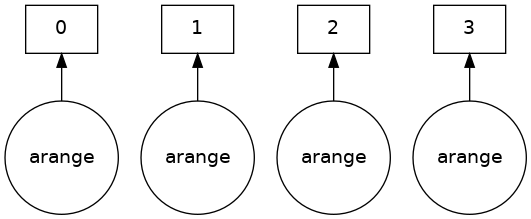

In [48]:
a_da.visualize()

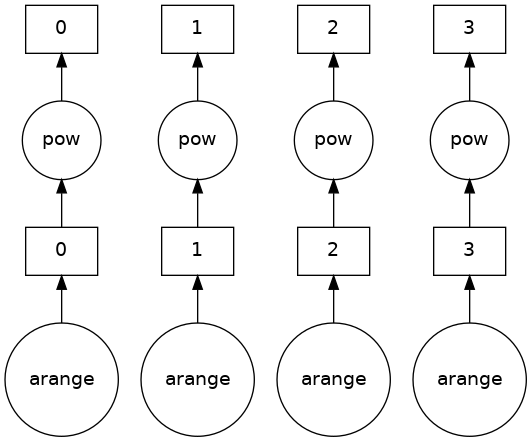

In [49]:
(a_da ** 2).visualize()

In [50]:
print(a_da.chunks)
print(a_da.chunksize)

((5, 5, 5, 2),)
(5,)


In [51]:
x = da.random.random(20, chunks=5)
x

dask.array<random_sample, shape=(20,), dtype=float64, chunksize=(5,), chunktype=numpy.ndarray>

In [52]:
result = x.sum()
result

dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

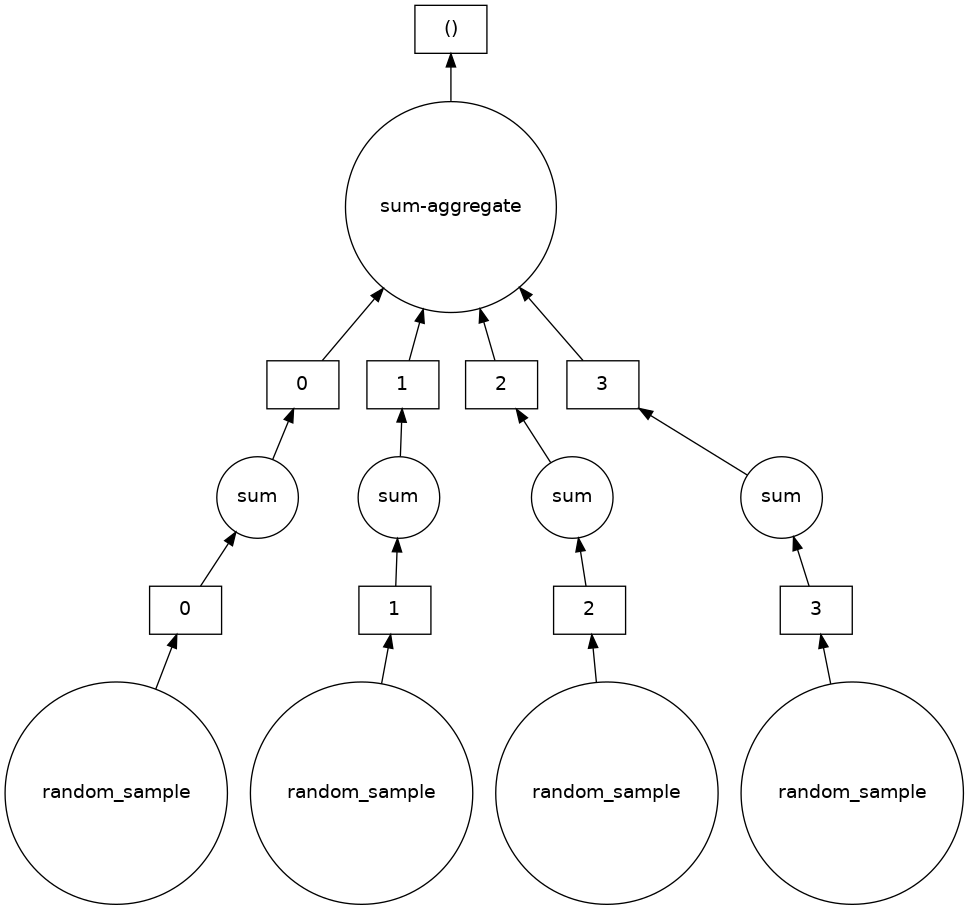

In [53]:
result.visualize()

In [54]:
result.compute()

11.91671737956052

In [55]:
x = da.random.random(size=(15, 15), chunks=(10, 5))
x

dask.array<random_sample, shape=(15, 15), dtype=float64, chunksize=(10, 5), chunktype=numpy.ndarray>

In [56]:
print(x.chunks)
print(x.chunksize)

((10, 5), (5, 5, 5))
(10, 5)


In [57]:
result = (x + x.T).sum()
result

dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

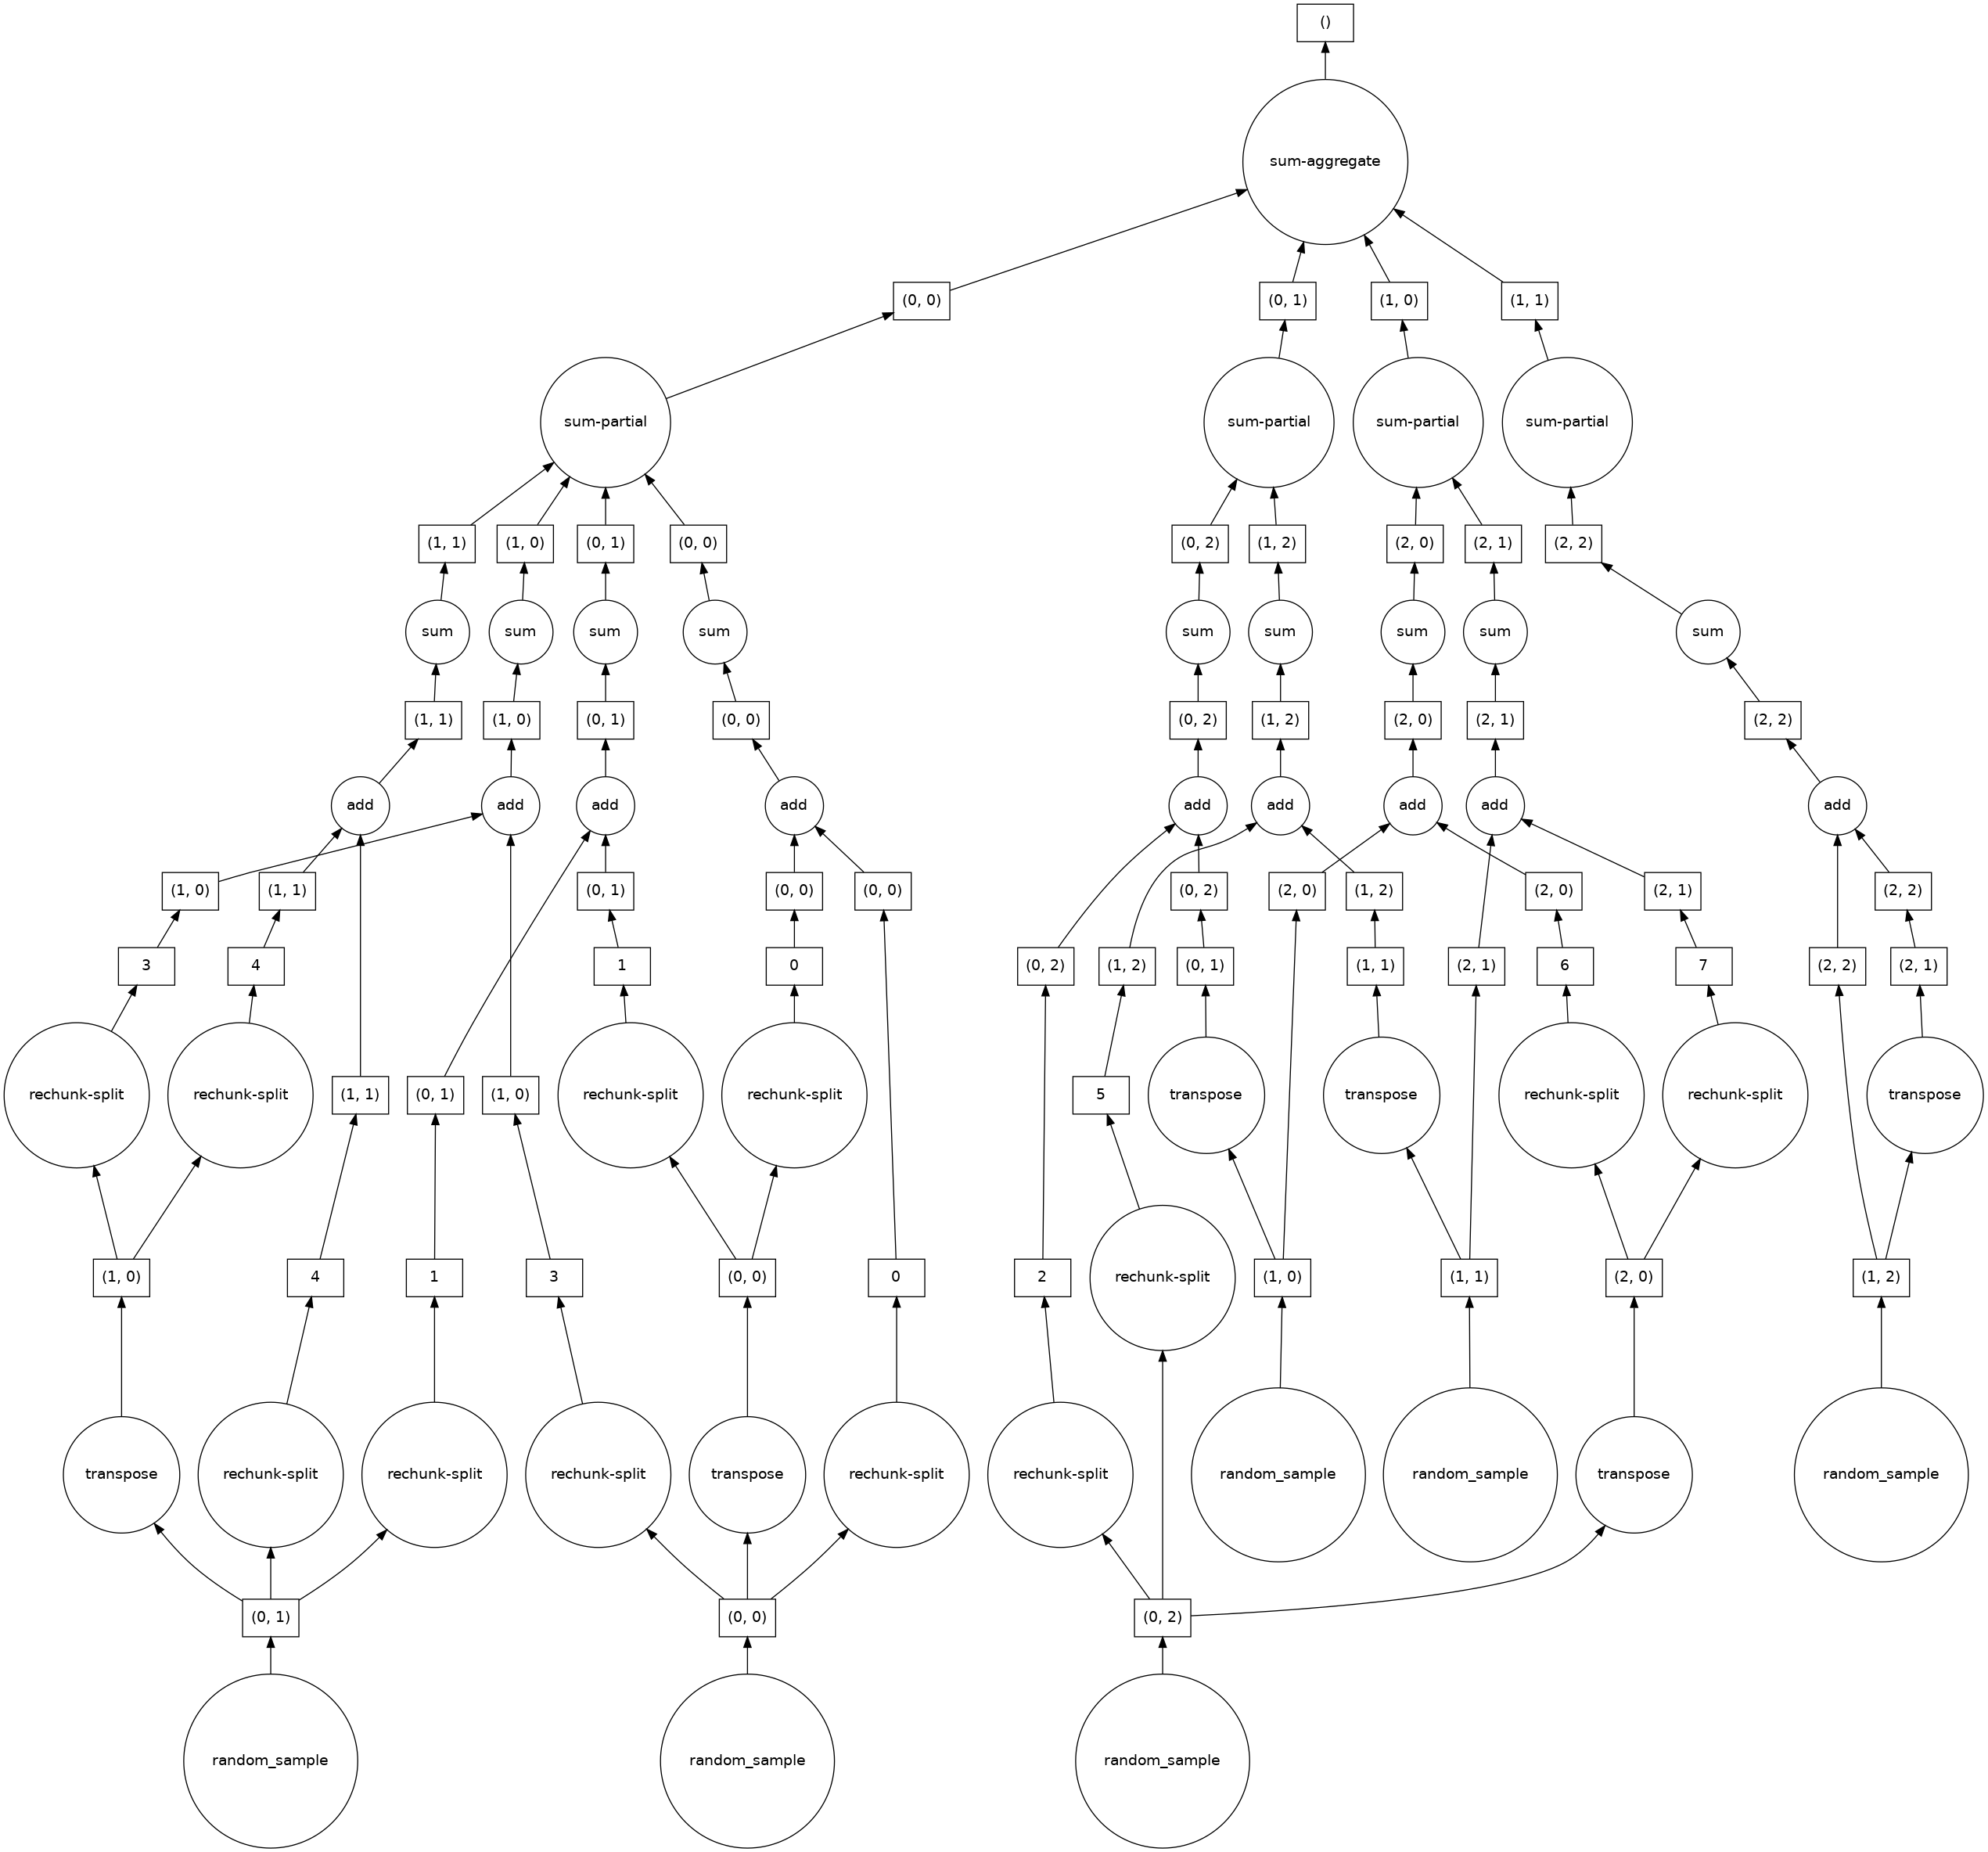

In [58]:
result.visualize()

In [59]:
result.compute()

227.5306285706584

In [60]:
x = da.random.random(size=(20_000, 20_000), chunks=(2_000, 2_000))
x

dask.array<random_sample, shape=(20000, 20000), dtype=float64, chunksize=(2000, 2000), chunktype=numpy.ndarray>

In [61]:
result = (x + x.T).sum()
result

dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [62]:
result.compute()

399994619.01002246